## Pobranie Danych

In [ ]:
# Wyeksportowany model regresji i poboczne kody innych modeli

In [ ]:
# !pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zygmuntyt/nutrition5k-dataset-side-angle-images")

print("Path to dataset files:", path)

100%|██████████| 5.97G/5.97G [01:32<00:00, 69.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2


In [ ]:
!pwd

/content


In [ ]:
# prompt: przenieś pliki z folderu path do content/nutrition5k

import os
import shutil

# Assuming 'path' variable holds the correct path from the previous code cell
# If not, uncomment and replace with actual path
# path = "/path/to/your/downloaded/dataset"

if os.path.exists(path):
  destination_folder = "/content/nutrition5k"
  os.makedirs(destination_folder, exist_ok=True)

  for filename in os.listdir(path):
    source_path = os.path.join(path, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):
      shutil.move(source_path, destination_path)
    else:  # Handle directories if needed
      shutil.move(source_path, destination_path)

  print(f"Files moved from '{path}' to '{destination_folder}'")

else:
  print(f"Error: Source path '{path}' does not exist.")

!ls /content/nutrition5k

Files moved from '/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2' to '/content/nutrition5k'
dish_1550704750  dish_1551381829  dish_1559238566  dish_1562180089  dish_1565194752
dish_1550704903  dish_1551381877  dish_1559238608  dish_1562180157  dish_1565194781
dish_1550705288  dish_1551381921  dish_1559238993  dish_1562181217  dish_1565194823
dish_1550705370  dish_1551381990  dish_1559239151  dish_1562181247  dish_1565194852
dish_1550705445  dish_1551382060  dish_1559239256  dish_1562181285  dish_1565194906
dish_1550705477  dish_1551382115  dish_1559239369  dish_1562183065  dish_1565195362
dish_1550705504  dish_1551382149  dish_1559239753  dish_1562183096  dish_1565195398
dish_1550705535  dish_1551382179  dish_1559239912  dish_1562183125  dish_1565195436
dish_1550705580  dish_1551382255  dish_1559239985  dish_1562183151  dish_1565195493
dish_1550705623  dish_1551384024  dish_1559240089  dish_1562183175  dish_1565196260
dish_1550705669  dish_15

In [ ]:
import os

destination_dir = "/content/nutrition5k"

file_types = set()
for root, _, files in os.walk(destination_dir):
    for file in files:
        file_types.add(os.path.splitext(file)[1])

print("File types in", destination_dir + ":")
for file_type in file_types:
    print(file_type)

File types in /content/nutrition5k:
.jpeg


In [ ]:
!gsutil -m cp -r "gs://nutrition5k_dataset/nutrition5k_dataset/metadata" .


Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe2.csv...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/ingredients_metadata.csv...
/ [3/3 files][  2.2 MiB/  2.2 MiB] 100% Done                                    
Operation completed over 3 objects/2.2 MiB.                                      


In [ ]:
!head -n 22 /content/metadata/dish_metadata_cafe2.csv
print('*' * 10)
#!head -n 80 /content/metadata/ingredients_metadata.csv

dish_1572974428,0.000000,74.000000,0.000000,0.000000,0.000000,ingr_0000000032,tomatoes,15.572240,5.2945616,0.10900568,1.05891232,0.10900568,ingr_0000000042,avocado,23.358358,37.3733728,3.5037537,2.10225222,0.46716716,ingr_0000000098,multigrain bread,13.732376,39.233398232,1.263378592,6.72886424,0.563027416,ingr_0000000161,olive oil,3.893060,34.4146504,3.89306,0.0,0.0,ingr_0000000281,edamame,15.572240,18.9981328,0.79418424,1.52607952,1.7129464,ingr_0000000291,salt,0.045775,0.0,0.0,0.0,0.0,ingr_0000000364,sunflower seeds,1.141160,6.2307336,0.57058,0.171174,0.2168204,ingr_0000000531,pumpkin seeds,0.684788,3.05415448,0.13010972,0.36978552,0.13010972
dish_1572464692,0.000000,56.000000,0.000000,0.000000,0.000000,ingr_0000000442,hummus,56.000000,92.96,5.376,7.84,4.424
dish_1571931594,0.000000,66.000000,0.000000,0.000000,0.000000,ingr_0000000433,roasted potatoes,66.000000,93.06,4.488,11.88,1.386
dish_1575478635,0.000000,132.000000,0.000000,0.000000,0.000000,ingr_0000000008,scrambled eggs,132.0

### Testowy dataframe

In [ ]:
import pandas as pd

# 20 linii
with open('/content/metadata/dish_metadata_cafe2.csv', 'r') as f:
    lines = [next(f) for x in range(20)]

dish_data = []
ingredients_data = []
nutritional_values = []

for line in lines[1:]:  
    row = line.strip().split(',')
    dish_id = row[0]
    dish_nutritional_values = row[1:6] 

    dish_data.append([dish_id] + dish_nutritional_values)

    ingredients = []
    i = 6
    while i < len(row):
        ingredient_id = row[i]
        ingredient_name = row[i+1]
        nutritional = row[i+2 : i+7]
        ingredients.append([ingredient_id, ingredient_name] + nutritional)
        i += 7

    for ingredient in ingredients:
        ingredients_data.append([dish_id, ingredient[0], ingredient[1]])
        nutritional_values.append([dish_id, ingredient[0]] + ingredient[2:])


# pandas DataFrame
dish_df = pd.DataFrame(dish_data, columns=['dish_id', 'nutritional_value_1', 'weight', 'nutritional_value_3', 'nutritional_value_4', 'nutritional_value_5'])
ingredients_df = pd.DataFrame(ingredients_data, columns=['dish_id', 'ingredient_id', 'ingredient_name'])
nutritional_df = pd.DataFrame(nutritional_values, columns=['dish_id', 'ingredient_id', 'weight', 'calories', 'fats', 'carbohydrates', 'proteins'])

print("Dish Data:")
print(dish_df)
print("\nIngredients Data:")
print(ingredients_df)
print("\nNutritional Values Data:")
nutritional_df

Dish Data:
            dish_id nutritional_value_1      weight nutritional_value_3  \
0   dish_1562688426          137.569992   88.000000            8.256000   
1   dish_1561662054          419.438782  292.000000           23.838249   
2   dish_1562008979          382.936646  290.000000           22.224644   
3   dish_1560455030           20.590000  103.000000            0.148000   
4   dish_1558372433           74.360001  143.000000            0.286000   
5   dish_1563379132          232.050003  119.000000           14.280000   
6   dish_1565640549           45.482903  139.000000            1.568471   
7   dish_1563207364          309.269989  271.000000           13.774000   
8   dish_1561575474          120.058434  183.000000            4.966118   
9   dish_1550795690           68.119995  131.000000            0.262000   
10  dish_1563216717          246.007996  332.000000            5.636517   
11  dish_1565972591          195.199997  122.000000           12.200000   
12  dish_15686

,dish_id,ingredient_id,weight,calories,fats,carbohydrates,proteins
0,dish_1562688426,ingr_0000000433,17.000000,23.97,1.156,3.06,0.357
1,dish_1562688426,ingr_0000000510,71.000000,113.6,7.1,2.13,9.94
2,dish_1561662054,ingr_0000000312,0.300716,0.1202864,0.000601432,0.027966588,0.00601432
3,dish_1561662054,ingr_0000000026,12.028640,15.637232,0.03608592,3.3680192,0.32477328
4,dish_1561662054,ingr_0000000029,75.281570,21.0788396,0.30112628,3.98992321,1.65619454
...,...,...,...,...,...,...,...
96,dish_1562183096,ingr_0000000515,13.504145,3.37603625,0.094529015,0.499653365,0.35110777
97,dish_1562183096,ingr_0000000126,0.150716,0.092388908,0.004973628,0.00904296,0.005576492
98,dish_1562183096,ingr_0000000161,1.929163,17.05380092,1.929163,0.0,0.0
99,dish_1562183096,ingr_0000000124,0.482291,3.150807103,0.309630822,0.067038449,0.072825941


In [ ]:
import pandas as pd

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

# Print the Ingredients Data
print("Ingredients Data:")
print(ingredients_df)

Ingredients Data:
            dish_id    ingredient_id   ingredient_name
0   dish_1572464692  ingr_0000000442            hummus
1   dish_1571931594  ingr_0000000433  roasted potatoes
2   dish_1575478635  ingr_0000000008    scrambled eggs
3   dish_1572887017  ingr_0000000015       hash browns
4   dish_1572887017  ingr_0000000128        egg whites
..              ...              ...               ...
67  dish_1572291671  ingr_0000000161         olive oil
68  dish_1572291671  ingr_0000000291              salt
69  dish_1572291671  ingr_0000000312            pepper
70  dish_1572291671  ingr_0000000448         jalapenos
71  dish_1572291671  ingr_0000000513            millet

[72 rows x 3 columns]


## Procesowanie dataframe

In [ ]:
import pandas as pd

dish_data = []
ingredients_data = []
nutritional_values = []

def process_csv(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines[1:]:
        row = line.strip().split(',')
        dish_id = row[0]
        dish_nutritional_values = row[1:6]

        dish_data.append([dish_id] + dish_nutritional_values)

        ingredients = []
        i = 6
        while i < len(row):
            ingredient_id = row[i]
            ingredient_name = row[i + 1]
            nutritional = row[i + 2:i + 7]
            ingredients.append([ingredient_id, ingredient_name] + nutritional)
            i += 7

        for ingredient in ingredients:
            ingredients_data.append([dish_id, ingredient[0], ingredient[1]])
            nutritional_values.append([dish_id, ingredient[0]] + ingredient[2:])


process_csv('/content/metadata/dish_metadata_cafe1.csv')
process_csv('/content/metadata/dish_metadata_cafe2.csv')

dish_df = pd.DataFrame(dish_data, columns=['dish_id', 'nutritional_value_1', 'weight', 'nutritional_value_3', 'nutritional_value_4', 'nutritional_value_5'])
ingredients_df = pd.DataFrame(ingredients_data, columns=['dish_id', 'ingredient_id', 'ingredient_name'])
nutritional_df = pd.DataFrame(nutritional_values, columns=['dish_id', 'ingredient_id', 'weight', 'calories', 'fats', 'carbohydrates', 'proteins'])

print("Dish Data:")
print(dish_df)
print("\nIngredients Data:")
print(ingredients_df)
print("\nNutritional Values Data:")
print(nutritional_df)

Dish Data:
              dish_id nutritional_value_1      weight nutritional_value_3  \
0     dish_1562688426          137.569992   88.000000            8.256000   
1     dish_1561662054          419.438782  292.000000           23.838249   
2     dish_1562008979          382.936646  290.000000           22.224644   
3     dish_1560455030           20.590000  103.000000            0.148000   
4     dish_1558372433           74.360001  143.000000            0.286000   
...               ...                 ...         ...                 ...   
4999  dish_1571934465            0.000000  232.000000            0.000000   
5000  dish_1573073666            0.000000   15.000000            0.000000   
5001  dish_1575924356            0.000000  103.000000            0.000000   
5002  dish_1574359199            0.000000  329.000000            0.000000   
5003  dish_1576171157            0.000000  132.000000            0.000000   

     nutritional_value_4 nutritional_value_5  
0               5

In [ ]:
nutritional_dfc = nutritional_df.copy()

nutritional_dfc['calories'] = pd.to_numeric(nutritional_dfc['calories'], errors='coerce')
nutritional_dfc['weight'] = pd.to_numeric(nutritional_dfc['weight'], errors='coerce') # Convert weight to numeric as well

ml_data = []

for index, dish_row in dish_df.iterrows():
    dish_id = dish_row['dish_id']

    ingredients = []
    calories = []

    for ing_index, ing_row in ingredients_df[ingredients_df['dish_id'] == dish_id].iterrows():
        ingredient_id = ing_row['ingredient_id']
        ingredient_name = ing_row['ingredient_name']

        ingredient_data = nutritional_dfc[(nutritional_dfc['dish_id'] == dish_id) & (nutritional_dfc['ingredient_id'] == ingredient_id)]

        total_calories = (ingredient_data['calories'] * ingredient_data['weight'] / ingredient_data['weight'].sum()).sum()

        ingredients.append(ingredient_name)
        calories.append(total_calories)

    ml_data.append({
        'image_id': dish_id,
        'ingredients': ingredients,
        'calories': calories
    })

ml_df = pd.DataFrame(ml_data)

print(ml_df)

             image_id                                        ingredients  \
0     dish_1562688426          [roasted potatoes, chicken apple sausage]   
1     dish_1561662054  [pepper, white rice, mixed greens, garlic, soy...   
2     dish_1562008979  [jalapenos, lemon juice, pork, wheat berry, ca...   
3     dish_1560455030         [cherry tomatoes, cucumbers, baby carrots]   
4     dish_1558372433                                       [deprecated]   
...               ...                                                ...   
4999  dish_1571934465                                     [strawberries]   
5000  dish_1573073666  [broccoli, olive oil, bread crumbs, salt, jala...   
5001  dish_1575924356                                            [pasta]   
5002  dish_1574359199         [scrambled eggs, roasted potatoes, crepes]   
5003  dish_1576171157  [brussels sprouts, almonds, olive oil, chili, ...   

                                               calories  
0                            

In [ ]:
import os
import pandas as pd

ml2_df = ml_df.copy()

# Tworzenie listy do przechowywania ścieżek obrazów
image_paths_dict = {} 

# Iteracja po ramce danych ml2_df
for index, row in ml2_df.iterrows():
  image_id = row['image_id']
  image_dir = os.path.join("/content/nutrition5k", image_id)

  # Sprawdzenie istnienia katalogu z obrazami
  if os.path.isdir(image_dir):
    image_files = []
    for root, _, files in os.walk(image_dir):
      for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
          image_files.append(os.path.join(root, file))

    image_paths_dict[image_id] = image_files
  else:
    image_paths_dict[image_id] = []  # Pusta lista, jeśli nie ma katalogu lub obrazów
    print(f"Warning: No image directory found for image_id {image_id} at {image_dir}")

ml2_df['image_paths'] = ml2_df['image_id'].map(image_paths_dict)

display(ml2_df)

,image_id,ingredients,calories,image_paths
0,dish_1562688426,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]",[/content/nutrition5k/dish_1562688426/frames_s...
1,dish_1561662054,"[pepper, white rice, mixed greens, garlic, soy...","[0.12028640000000002, 15.637232, 21.0788396, 4...",[/content/nutrition5k/dish_1561662054/frames_s...
2,dish_1562008979,"[jalapenos, lemon juice, pork, wheat berry, ca...","[0.05595869, 0.26242713, 275.5485341, 14.04757...",[/content/nutrition5k/dish_1562008979/frames_s...
3,dish_1560455030,"[cherry tomatoes, cucumbers, baby carrots]","[9.9, 2.9, 7.789999999999999]",[/content/nutrition5k/dish_1560455030/frames_s...
4,dish_1558372433,[deprecated],[74.36],[/content/nutrition5k/dish_1558372433/frames_s...
...,...,...,...,...
4999,dish_1571934465,[strawberries],[76.56],[/content/nutrition5k/dish_1571934465/frames_s...
5000,dish_1573073666,"[broccoli, olive oil, bread crumbs, salt, jala...","[5.02325495, 2.37887052, 0.78114015, 0.0, 0.05...",[/content/nutrition5k/dish_1573073666/frames_s...
5001,dish_1575924356,[pasta],[135.548],[/content/nutrition5k/dish_1575924356/frames_s...
5002,dish_1574359199,"[scrambled eggs, roasted potatoes, crepes]","[164.28000000000003, 166.38, 165.0]",[/content/nutrition5k/dish_1574359199/frames_s...


In [ ]:
pd.set_option('display.max_colwidth', None) 

display(ml2_df)

,image_id,ingredients,calories,image_paths
0,dish_1562688426,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]","[/content/nutrition5k/dish_1562688426/frames_sampled30/camera_C_frame_001.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_001.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_A_frame_001.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_D_frame_002.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_002.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_D_frame_001.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_A_frame_002.jpeg, /content/nutrition5k/dish_1562688426/frames_sampled30/camera_C_frame_002.jpeg]"
1,dish_1561662054,"[pepper, white rice, mixed greens, garlic, soy sauce, millet, lemon juice, bok choy, olive oil, onions, vinegar, green beans, pork, apple, sugar, salt, parsley]","[0.12028640000000002, 15.637232, 21.0788396, 4.4806684, 2.55007168, 14.33361069, 0.51191471, 1.5637231999999999, 101.15433431999999, 2.40901, 0.0, 12.09, 200.39713764, 7.82928276, 35.0033424, 0.0, 0.279294736]","[/content/nutrition5k/dish_1561662054/frames_sampled30/camera_C_frame_001.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_B_frame_001.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_A_frame_001.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_D_frame_002.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_B_frame_002.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_D_frame_001.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_A_frame_002.jpeg, /content/nutrition5k/dish_1561662054/frames_sampled30/camera_C_frame_002.jpeg]"
2,dish_1562008979,"[jalapenos, lemon juice, pork, wheat berry, cabbage, pepper, salt, carrot, garlic, caesar salad, olive oil, parsley, mayonnaise]","[0.05595869, 0.26242713, 275.5485341, 14.04757263, 3.24174753, 0.1543688, 0.0, 1.58228143, 2.30009661, 57.64, 6.8231098, 0.286354495, 20.9941772]","[/content/nutrition5k/dish_1562008979/frames_sampled30/camera_C_frame_001.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_B_frame_001.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_A_frame_001.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_D_frame_002.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_B_frame_002.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_D_frame_001.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_A_frame_002.jpeg, /content/nutrition5k/dish_1562008979/frames_sampled30/camera_C_frame_002.jpeg]"
3,dish_1560455030,"[cherry tomatoes, cucumbers, baby carrots]","[9.9, 2.9, 7.789999999999999]","[/content/nutrition5k/dish_1560455030/frames_sampled30/camera_C_frame_001.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_B_frame_001.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_A_frame_001.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_D_frame_002.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_B_frame_002.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_D_frame_001.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_A_frame_002.jpeg, /content/nutrition5k/dish_1560455030/frames_sampled30/camera_C_frame_002.jpeg]"
4,dish_1558372433,[deprecated],[74.36],"[/content/nutrition5k/dish_1558372433/frames_sampled30/camera_C_frame_001.jpeg, /content/nutrition5k/dish_1558372433/frames_sampled30/camera_B_frame_001.jpeg, /content/nutrition5k/dish_1558372433/frames_sampled30/camera_A_frame_001.jpeg, /content/nutrition5k/dish_1558372433/frames_sampled30/camera_D_frame_002.jpeg, /content/nutrition5k/dish_1558372433/frames_sampled30/camera_B_frame_002.jpeg, /content/nutrition5k/dish_1558372433/frames_sampled30/camera_D_frame_001.jpeg, /content/nutrition5k/dish_1558372433/f

In [ ]:
import pandas as pd

expanded_ml2_df = []

for index, row in ml2_df.iterrows():
    image_id = row['image_id']
    ingredients = row['ingredients']
    calories = row['calories']
    image_paths = row['image_paths']

    for i in range(len(image_paths)):
        expanded_row = {
            'image_id': image_id,
            'image_path': image_paths[i] if image_paths else None,
            'ingredients': ingredients, 
            'calories': calories 
        }
        expanded_ml2_df.append(expanded_row)

expanded_ml2_df = pd.DataFrame(expanded_ml2_df)
expanded_ml2_df

,image_id,image_path,ingredients,calories
0,dish_1562688426,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_C_frame_001.jpeg,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]"
1,dish_1562688426,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_001.jpeg,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]"
2,dish_1562688426,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_A_frame_001.jpeg,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]"
3,dish_1562688426,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_D_frame_002.jpeg,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]"
4,dish_1562688426,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_002.jpeg,"[roasted potatoes, chicken apple sausage]","[23.97, 113.6]"
...,...,...,...,...
54832,dish_1576171157,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_D_frame_002.jpeg,"[brussels sprouts, almonds, olive oil, chili, salt, chicken apple sausage]","[32.81433544, 1.70204202, 12.64878472, 0.38156200000000007, 0.0, 84.8]"
54833,dish_1576171157,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_B_frame_002.jpeg,"[brussels sprouts, almonds, olive oil, chili, salt, chicken apple sausage]","[32.81433544, 1.70204202, 12.64878472, 0.38156200000000007, 0.0, 84.8]"
54834,dish_1576171157,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_D_frame_001.jpeg,"[brussels sprouts, almonds, olive oil, chili, salt, chicken apple sausage]","[32.81433544, 1.70204202, 12.64878472, 0.38156200000000007, 0.0, 84.8]"
54835,dish_1576171157,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_A_frame_002.jpeg,"[brussels sprouts, almonds, olive oil, chili, salt, chicken apple sausage]","[32.81433544, 1.70204202, 12.64878472, 0.38156200000000007, 0.0, 84.8]"


# trenowanie

## 1 (nieużywane)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os.makedirs('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4', exist_ok=True)

In [ ]:
# !ls '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model 4'

ls: cannot access '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model 4': No such file or directory


In [ ]:
# !pip install -Uqq fastai

In [ ]:
# from fastai.vision.all import *
# import fastai.callback.all
# from fastai.text.all import *

# def get_x(row):
#     return row['image_path']

# def get_y(row):
#     return [row['ingredients'], row['calories']] 


# food_block = DataBlock(
#     blocks=(ImageBlock, (MultiCategoryBlock, RegressionBlock)),
#     get_x=get_x,
#     get_y=get_y,
#     splitter=RandomSplitter(valid_pct=0.2),
#     item_tfms=Resize(224),
#     batch_tfms=[
#         *aug_transforms(size=224, min_scale=0.8, max_rotate=20, max_zoom=1.2, max_lighting=0.4, max_warp=0.3),
#         Normalize.from_stats(*imagenet_stats)
#     ]
# )


# valid_data = expanded_ml2_df[expanded_ml2_df['image_path'].apply(lambda x: isinstance(x, str) and os.path.isfile(x))]

# dls = food_block.dataloaders(valid_data, bs=64, n_inp=1) # Use expanded_ml2_df

# all_ingredients = set()
# for ingredients_list in expanded_ml2_df['ingredients']:
#     all_ingredients.update(ingredients_list)

# vocab_size = len(all_ingredients)
# num_classes = vocab_size        
# num_ingredients = vocab_size    


# class FoodModel(nn.Module):
#     def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_ingredients, output_dim):
#         super().__init__()
#         self.cnn = create_body(resnet34(), pretrained=True) 
#         self.head = create_head(num_features_model(self.cnn), num_classes + 1)

#     def forward(self, x):
#         features = self.cnn(x)
#         out = self.head(features)
#         ingredients_out = out[:, :num_classes] 
#         calories_out = out[:, num_classes:]
#         return ingredients_out, calories_out

# model = FoodModel(vocab_size, 100, 256, 2, num_ingredients, 1)


# def custom_loss(preds, *yb):
#     ingredients_preds, calories_preds = preds

#     if len(yb) == 2 and isinstance(yb[0], (list, Tensor)) and isinstance(yb[1], torch.Tensor):
#         ingredients_targs, calories_targs = yb

#         if isinstance(ingredients_targs, Tensor) and ingredients_targs.shape == torch.Size([]):
#             return MSELossFlat()(calories_preds, calories_targs)

#         if isinstance(ingredients_targs, list):
#             ingredients_targs_tensor = torch.stack([torch.tensor(dls.vocab.numericalize(ing)) for ing in ingredients_targs])
#         else:
#             ingredients_targs_tensor = ingredients_targs

#         ingredients_loss = CrossEntropyLossFlat()(ingredients_preds, ingredients_targs_tensor.long())
#         calories_loss = MSELossFlat()(calories_preds, calories_targs)

#         return ingredients_loss + calories_loss
#     else: 
#         target_tensor = yb[0] if yb else torch.tensor([0.0]).to(calories_preds.device)

#         if isinstance(target_tensor, list):
#             target_tensor = torch.tensor(target_tensor, dtype=torch.float32).to(calories_preds.device) # Assuming calorie target is float32

#         if target_tensor.dtype != torch.float32:
#             target_tensor = target_tensor.type(torch.float32)

#         return MSELossFlat()(calories_preds, target_tensor)  

# learn = Learner(dls, model, loss_func=custom_loss, metrics=[accuracy_multi, mae]).to_fp16() 

In [ ]:
# lr_min, lr_steep = learn.lr_find()

# print(f"Suggested lr_min: {lr_min:.6f}")
# print(f"Suggested lr_steep: {lr_steep:.6f}")

In [ ]:
# learn.fine_tune(epochs=10) # Adjust epochs as necessary

In [ ]:
# import os
# import torch
# from torch import nn
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms, models
# from sklearn.preprocessing import MultiLabelBinarizer
# import pandas as pd

# class FoodDataset(Dataset):
#     def __init__(self, dataframe, image_transform=None):
#         self.data = dataframe
#         self.image_transform = image_transform
#         self.ingredients_encoder = MultiLabelBinarizer()
#         self.ingredients_encoder.fit(dataframe['ingredients'])

#         self.images = dataframe['image_path']
#         self.ingredients = self.ingredients_encoder.transform(dataframe['ingredients'])
#         self.calories = dataframe['calories'].values

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         image_path = self.images.iloc[idx]
#         ingredients = torch.tensor(self.ingredients[idx], dtype=torch.float32)
#         calories = torch.tensor(self.calories[idx], dtype=torch.float32)

#         if os.path.isfile(image_path):
#             image = Image.open(image_path).convert("RGB")
#         else:
#             raise FileNotFoundError(f"Image not found: {image_path}")

#         if self.image_transform:
#             image = self.image_transform(image)

#         return image, ingredients, calories


# image_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# train_data = valid_data.sample(frac=0.8, random_state=42)
# valid_data = valid_data.drop(train_data.index)

# train_dataset = FoodDataset(train_data, image_transform=image_transform)
# valid_dataset = FoodDataset(valid_data, image_transform=image_transform)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size=64)

# class FoodLSTMModel(nn.Module):
#     def __init__(self, num_ingredients, embedding_dim=256, hidden_dim=512):
#         super(FoodLSTMModel, self).__init__()

#         self.image_model = models.resnet18(pretrained=True)
#         self.image_model.fc = nn.Linear(self.image_model.fc.in_features, embedding_dim)

#         self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)

#         self.ingredient_head = nn.Sequential(
#             nn.Linear(hidden_dim, num_ingredients),
#             nn.Sigmoid()
#         )
#         self.calorie_head = nn.Linear(hidden_dim, 1)

#     def forward(self, image_batch):
#         image_features = self.image_model(image_batch)
#         image_features = image_features.unsqueeze(1)

#         lstm_out, _ = self.lstm(image_features)
#         lstm_out = lstm_out[:, -1, :] 

#         ingredients = self.ingredient_head(lstm_out)
#         calories = self.calorie_head(lstm_out)

#         return ingredients, calories


# num_ingredients = len(train_dataset.ingredients_encoder.classes_)
# model = FoodLSTMModel(num_ingredients=num_ingredients).cuda()

# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# criterion_ingredients = nn.BCELoss()  
# criterion_calories = nn.MSELoss() 

# def train_model(model, train_loader, valid_loader, epochs=10):
#     for epoch in range(epochs):
#         model.train()
#         train_loss = 0.0

#         for images, ingredients, calories in train_loader:
#             images, ingredients, calories = images.cuda(), ingredients.cuda(), calories.cuda()

#             pred_ingredients, pred_calories = model(images)

#             loss_ingredients = criterion_ingredients(pred_ingredients, ingredients)
#             loss_calories = criterion_calories(pred_calories, calories)
#             loss = loss_ingredients + loss_calories

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()

#         model.eval()
#         valid_loss = 0.0
#         with torch.no_grad():
#             for images, ingredients, calories in valid_loader:
#                 images, ingredients, calories = images.cuda(), ingredients.cuda(), calories.cuda()
#                 pred_ingredients, pred_calories = model(images)

#                 loss_ingredients = criterion_ingredients(pred_ingredients, ingredients)
#                 loss_calories = criterion_calories(pred_calories, calories)
#                 valid_loss += (loss_ingredients + loss_calories).item()

#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Valid Loss: {valid_loss/len(valid_loader):.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


In [ ]:
# learn.fine_tune(epochs=20)

In [ ]:
!grep -c processor /proc/cpuinfo  #

12


## Zepsuty model do klasyfikacji (nieużywane)

| Epoch | Train Loss | Valid Loss | Accuracy Multi | Time |
|---|---|---|---|---|
| 0 | 1.012233 | 0.799819 | 0.141780 | 03:26 |
| 1 | 0.834527 | 0.650919 | 0.152160 | 03:24 |
| 2 | 0.562762 | 0.445993 | 0.227322 | 03:24 |
| 3 | 0.388230 | 0.296206 | 0.441182 | 03:23 |
| 4 | 0.343067 | 0.223059 | 0.659028 | 03:24 |
| 5 | 0.327270 | 0.186102 | 0.782085 | 03:24 |
| 6 | 0.320188 | 0.166624 | 0.841344 | 03:23 |
| 7 | 0.316748 | 0.155659 | 0.883117 | 03:24 |
| 8 | 0.314840 | 0.149415 | 0.898768 | 03:23 |
| 9 | 0.315169 | 0.145927 | 0.908567 | 03:23 |
| 10 | 0.314262 | 0.143994 | 0.911476 | 03:24 |
| 11 | 0.312857 | 0.142820 | 0.914306 | 03:24 |
| 12 | 0.312685 | 0.141949 | 0.914766 | 03:24 |
| 13 | 0.312872 | 0.141434 | 0.915392 | 03:24 |
| 14 | 0.312489 | 0.141037 | 0.915551 | 03:23 |
| 15 | 0.313214 | 0.140859 | 0.915865 | 03:24 |
| 16 | 0.311692 | 0.140682 | 0.915720 | 03:24 |
| 17 | 0.312222 | 0.140568 | 0.916329 | 03:24 |
| 18 | 0.312013 | 0.140510 | 0.916176 | 03:24 |
| 19 | 0.312373 | 0.140644 | 0.916372 | 03:24 |

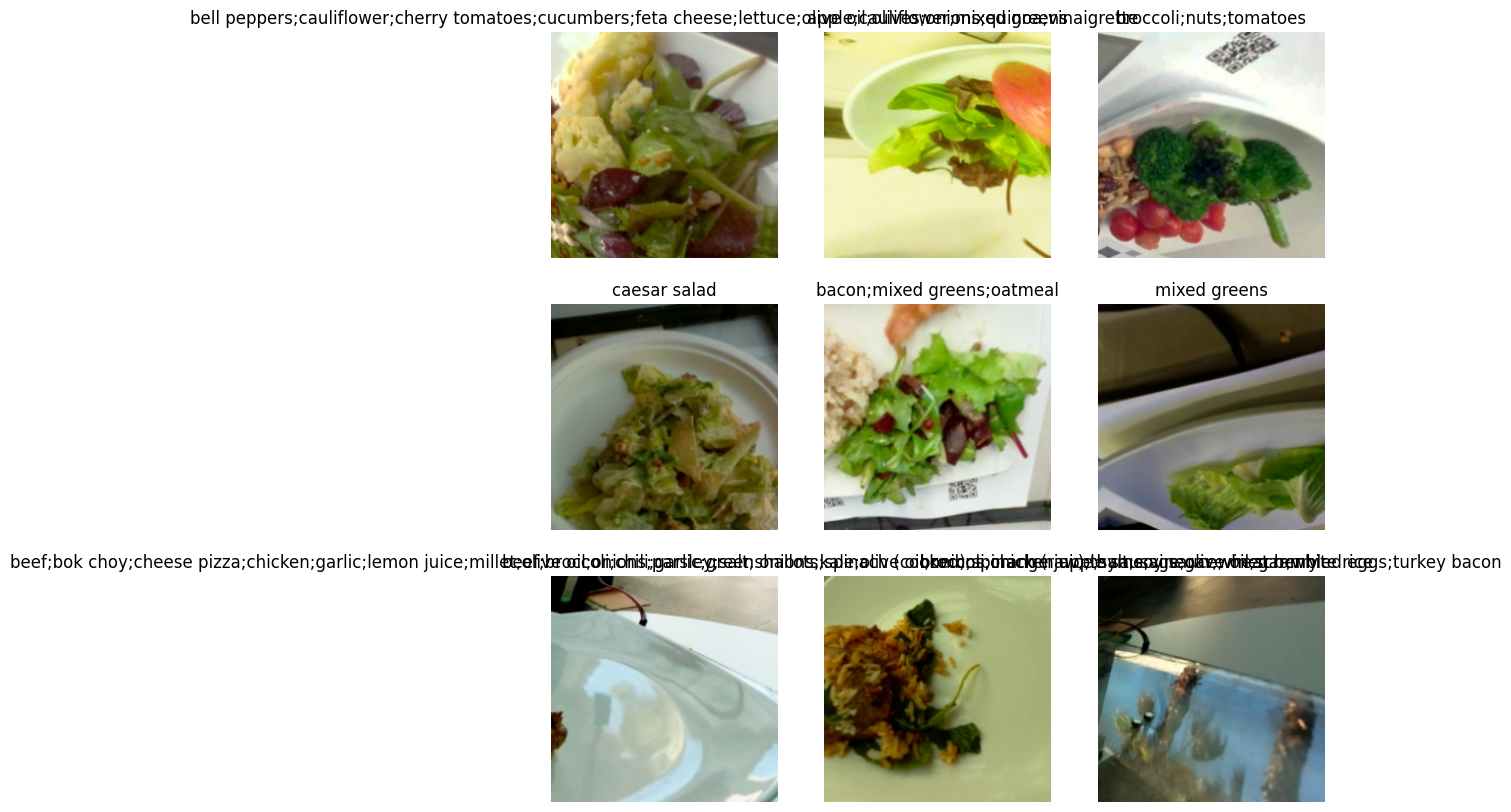

In [ ]:
from fastai.vision.all import *
import torch


filtered_expanded_ml2_df = expanded_ml2_df[expanded_ml2_df['ingredients'].apply(lambda ings: '' not in ings)].reset_index(drop=True)

all_classes = sorted(set(ing for sublist in filtered_expanded_ml2_df['ingredients'] for ing in sublist))

def get_x(row):
    return row['image_path']  

def get_y(row):
    return row['ingredients']

food_block = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=Resize(224),
    batch_tfms=[
        *aug_transforms(size=224, min_scale=0.8, max_rotate=20, max_zoom=1.2, max_lighting=0.4, max_warp=0.3),
        Normalize.from_stats(*imagenet_stats)
    ]
)

dls_ingredients = food_block.dataloaders(filtered_expanded_ml2_df, bs=64, num_workers=12) # Pass filtered_expanded_ml2_df to dataloaders

dls_ingredients.show_batch(max_n=9, figsize=(10, 10))


In [ ]:
model_ingredients = vision_learner(dls_ingredients, resnet101, metrics=partial(accuracy_multi, thresh=0.2))

checkpoint_cb = SaveModelCallback(
    monitor='accuracy_multi', 
    fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/best_classification_model',
    every_epoch=True  
)


Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:00<00:00, 207MB/s]


In [ ]:
model_ingredients = vision_learner(dls_ingredients, resnet101, metrics=partial(accuracy_multi, thresh=0.2))

checkpoint_cb = SaveModelCallback(
    monitor='accuracy_multi',  
    fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/best_classification_model',
    every_epoch=True 
)

model_ingredients.fit_one_cycle(20, lr_max=1e-3, cbs=[checkpoint_cb])

model_ingredients.save('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/final_classification_model')

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.012233,0.799819,0.141780,03:26
1,0.834527,0.650919,0.152160,03:24
2,0.562762,0.445993,0.227322,03:24
3,0.388230,0.296206,0.441182,03:23
4,0.343067,0.223059,0.659028,03:24
5,0.327270,0.186102,0.782085,03:24
6,0.320188,0.166624,0.841344,03:23
7,0.316748,0.155659,0.883117,03:24
8,0.314840,0.149415,0.898768,03:23
9,0.315169,0.145927,0.908567,03:23


Path('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/final_classification_model.pth')

In [ ]:
!ls '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/'

best_classification_model_0.pth   best_classification_model_16.pth  best_classification_model_4.pth
best_classification_model_10.pth  best_classification_model_17.pth  best_classification_model_5.pth
best_classification_model_11.pth  best_classification_model_18.pth  best_classification_model_6.pth
best_classification_model_12.pth  best_classification_model_19.pth  best_classification_model_7.pth
best_classification_model_13.pth  best_classification_model_1.pth   best_classification_model_8.pth
best_classification_model_14.pth  best_classification_model_2.pth   best_classification_model_9.pth
best_classification_model_15.pth  best_classification_model_3.pth   final_classification_model.pth


In [ ]:
import torch
from fastai.vision.all import *

state_dict = torch.load('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/best_classification_model_19.pth')

model_ingredients = vision_learner(dls_ingredients, resnet101, metrics=partial(accuracy_multi, thresh=0.2))

model_ingredients.model.load_state_dict(state_dict)



<ipython-input-21-0f6bcc2df0ac>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/be

<All keys matched successfully>

In [ ]:
fastai.

In [ ]:
# # Create a dataset with one entry per ingredient
# def prepare_regression_data(row):
#     data = []
#     for ing, cal in zip(row['ingredients'], row['calories']):
#         if ing in ingredients_vocab:
#             data.append({'image_path': row['image_path'], 'ingredient': ing, 'calories': cal})
#     return data

# regression_data = sum(filtered_expanded_ml2_df.apply(prepare_regression_data, axis=1).tolist(), [])
# df_regression = pd.DataFrame(regression_data)

# # Callback to save the model with the best RMSE score
# checkpoint_cb_regression = SaveModelCallback(
#     monitor='rmse',
#     fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model',
#     every_epoch=True
# )

# # Train the regression model with the checkpoint callback
# model_regression.fit_one_cycle(10, lr=1e-3, cbs=[checkpoint_cb_regression])

# # Callback to save the model every epoch
# checkpoint_cb_regression = SaveModelCallback(
#     monitor='rmse',  # Metric to monitor
#     fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model',
#     every_epoch=True  # Save the model after every epoch
# )

# # Train the regression model with the checkpoint callback
# model_regression.fit_one_cycle(20, lr=1e-3, cbs=[checkpoint_cb_regression])

## Procesowanie danych dla prostego modelu regresji

In [ ]:
import pandas as pd

# Zbior danych dla modelu regresji (prostego)

ml3_extended = []

for index, row in expanded_ml2_df.iterrows():
    image_path = row['image_path']
    total_calories = sum(row['calories'])  # Sumowanie kalorii ze wszystkich składników

    ml3_extended.append({
        'image_path': image_path,
        'total_calories': total_calories
    })

ml3_extended = pd.DataFrame(ml3_extended)
ml3_extended

,image_path,total_calories
0,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_C_frame_001.jpeg,137.570000
1,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_001.jpeg,137.570000
2,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_A_frame_001.jpeg,137.570000
3,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_D_frame_002.jpeg,137.570000
4,/content/nutrition5k/dish_1562688426/frames_sampled30/camera_B_frame_002.jpeg,137.570000
...,...,...
54832,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_D_frame_002.jpeg,132.346724
54833,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_B_frame_002.jpeg,132.346724
54834,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_D_frame_001.jpeg,132.346724
54835,/content/nutrition5k/dish_1576171157/frames_sampled30/camera_A_frame_002.jpeg,132.346724


In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

import torch;
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Wed Jan 15 16:26:01 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              52W / 400W |  40463MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
print(f"Allocated memory: {torch.cuda.memory_allocated()} bytes")
print(f"Max allocated memory: {torch.cuda.max_memory_allocated()} bytes")

Allocated memory: 41428511232 bytes
Max allocated memory: 41428548096 bytes


## model regresji

In [ ]:
# from fastai.vision.all import *

# # Definiowanie funkcji get_x i get_y
# def get_x(row):
#     return row['image_path']

# def get_y(row):
#     return row['total_calories']

# # Tworzenie DataBlock
# food_block = DataBlock(
#     blocks=(ImageBlock, RegressionBlock),
#     get_x=get_x,
#     get_y=get_y,
#     splitter=RandomSplitter(valid_pct=0.2),
#     item_tfms=Resize(224),
#     batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
# )

# # Tworzenie DataLoaders
# dls_cal = food_block.dataloaders(ml3_extended, bs=64)

# # Tworzenie modelu
# learn = vision_learner(dls_cal, resnet50, metrics=rmse)

# # Create a SaveModelCallback instance
# checkpoint_cb = SaveModelCallback(
#     monitor='valid_loss',  # Monitor validation loss for the best model
#     fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_simple',
#     every_epoch=True  # Save the model after every epoch
# )


# # Train the model with the checkpoint callback
# learn.fine_tune(20, cbs=[checkpoint_cb])  # Adjust the number of epochs

# # Save the final model
# learn.save('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/final_regression_model_simple')

Wyniki:

| Epoch | Train Loss | Valid Loss | _rmse | Time |
|---|---|---|---|---|
| 0 | 135744.015625 | 124412.835938 | 352.722015 | 10:32 |
| 1 | 80716.835938 | 94929.859375 | 308.106873 | 10:29 |
| 2 | 98265.710938 | 47679.000000 | 218.355194 | 10:30 |
| 3 | 56371.281250 | 79853.921875 | 282.584351 | 10:30 |
| 4 | 81647.968750 | 102898.718750 | 320.778290 | 10:30 |
| 5 | 70495.273438 | 201175.921875 | 448.526398 | 10:31 |
| 6 | 55080.625000 | 752034.437500 | 867.199219 | 10:30 |
| 7 | 58007.144531 | 56373.570312 | 237.431213 | 10:31 |
| 8 | 50410.160156 | 172612.343750 | 415.466461 | 10:32 |
| 9 | 51517.089844 | 1081135.750000 | 1039.776733 | 10:31 |
| 10 | 32080.695312 | 8562320.000000 | 2926.144287 | 10:31 |
| 11 | 29630.152344 | 16370743.000000 | 4046.077148 | 10:31 |
| 12 | 38019.328125 | 431124.062500 | 656.600281 | 10:32 |
| 13 | 26299.539062 | 597724.437500 | 773.126343 | 10:31 |
| 14 | 25735.470703 | 5134056.000000 | 2265.845459 | 10:30 |
| 15 | 32876.183594 | 2620938.000000 | 1618.931152 | 10:31 |
| 16 | 19440.175781 | 3517026.000000 | 1875.373535 | 10:30 |
| 17 | 18400.089844 | 2747865.250000 | 1657.668701 | 10:32 |
| 18 | 21664.562500 | 3563713.000000 | 1887.779907 | 10:31 |
| 19 | 21646.248047 | 1767825.250000 | 1329.595947 | 10:30 |

In [ ]:
# from fastai.vision.all import *

# def get_x(row): return row['image_path']
# def get_y(row): return row['total_calories']

# food_block = DataBlock(
#     blocks=(ImageBlock, RegressionBlock),
#     get_x=get_x,
#     get_y=get_y,
#     splitter=RandomSplitter(valid_pct=0.2),
#     item_tfms=Resize(256),
#     batch_tfms=[
#         *aug_transforms(size=256, min_scale=0.8, max_rotate=20, max_zoom=1.2, max_lighting=0.4, max_warp=0.3),
#         Normalize.from_stats(*imagenet_stats)
#     ]
# )

# dls_cal = food_block.dataloaders(ml3_extended, bs=128)

# learn_reg = vision_learner(dls_cal, resnet50, metrics=rmse)



Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


In [ ]:
# learn_reg.fine_tune(20, cbs=[SaveModelCallback(monitor='valid_loss',
#                                            fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_simple',
#                                            every_epoch=True)])

# learn_reg.save('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/final_regression_model_simple')


In [ ]:
# torch.save(learn_reg, '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_simple_export.pth')

In [ ]:
# !ls '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4'

best_classification_model_0.pth   best_classification_model_4.pth  regression_model_simple_15.pth
best_classification_model_10.pth  best_classification_model_5.pth  regression_model_simple_16.pth
best_classification_model_11.pth  best_classification_model_6.pth  regression_model_simple_17.pth
best_classification_model_12.pth  best_classification_model_7.pth  regression_model_simple_18.pth
best_classification_model_13.pth  best_classification_model_8.pth  regression_model_simple_1.pth
best_classification_model_14.pth  best_classification_model_9.pth  regression_model_simple_2.pth
best_classification_model_15.pth  final_classification_model.pth   regression_model_simple_3.pth
best_classification_model_16.pth  model_19_export.pth		   regression_model_simple_4.pth
best_classification_model_17.pth  regression_model_simple_0.pth    regression_model_simple_5.pth
best_classification_model_18.pth  regression_model_simple_10.pth   regression_model_simple_6.pth
best_classification_model_19.pth  r

In [ ]:
# from fastai.vision.all import *

# # Ścieżka do checkpointu
# checkpoint_path = '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/best_classification_model_19.pth'  # Zastąp właściwą ścieżką

# # Załaduj model z checkpointu
# learn = load_learner(checkpoint_path)

# # Przeprowadź walidację i uzyskaj wyniki
# interp = ClassificationInterpretation.from_learner(learn)
# loss, acc = interp.top_losses, interp.accuracy

# # Wyświetl wyniki
# print(f'Accuracy: {acc}')

<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 0: R-squared: 0.1830


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 1: R-squared: 0.3765


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 2: R-squared: 0.5731


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 3: R-squared: 0.0898


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 4: R-squared: 0.3103


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 5: R-squared: -0.5140


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 6: R-squared: -6.5598


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 7: R-squared: 0.4299


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 8: R-squared: -1.2122


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 9: R-squared: -8.6321


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 10: R-squared: -71.8406


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 11: R-squared: -234.6858


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 12: R-squared: -4.5691


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 13: R-squared: -8.8384


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 14: R-squared: -81.5957


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 15: R-squared: -32.2153


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 16: R-squared: -57.4481


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 17: R-squared: -43.5352


<ipython-input-43-7d0cd34fa644>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path)


Epoch 18: R-squared: -55.9718


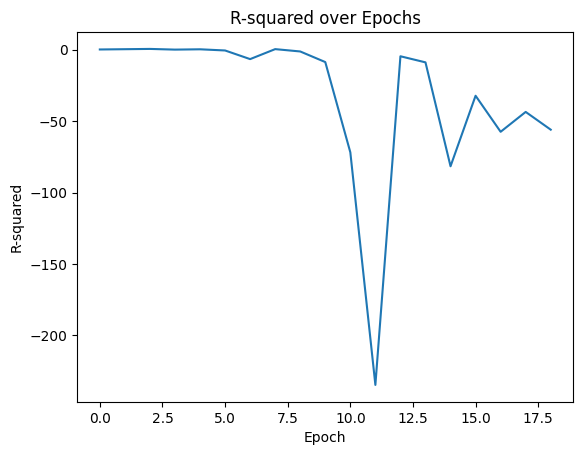

In [ ]:
# from fastai.vision.all import *
# from sklearn.metrics import r2_score
# import numpy as np

# checkpoint_dir = '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/'

# checkpoint_pattern = 'regression_model_simple_{}.pth'

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# r2_scores = []

# def get_x(row):
#     return row['image_path']
# def get_y(row):
#     return row['total_calories']

# food_block = DataBlock(
#     blocks=(ImageBlock, RegressionBlock),
#     get_x=get_x,
#     get_y=get_y,
#     splitter=RandomSplitter(valid_pct=0.2),
#     item_tfms=Resize(224),
#     batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
# )
# dls_cal = food_block.dataloaders(ml3_extended, bs=64)

# for epoch in range(20):
#     checkpoint_path = os.path.join(checkpoint_dir, checkpoint_pattern.format(epoch))

#     if os.path.exists(checkpoint_path):
#         learn = vision_learner(dls_cal, resnet50, metrics=rmse)
#         state_dict = torch.load(checkpoint_path)
#         learn.model.load_state_dict(state_dict)

#         preds, targets = learn.get_preds(dl=dls_cal.valid)

#         preds = preds.cpu().numpy().flatten()
#         targets = targets.cpu().numpy().flatten()

#         r2 = r2_score(targets, preds)
#         r2_scores.append(r2)

#         print(f'Epoch {epoch}: R-squared: {r2:.4f}')

# import matplotlib.pyplot as plt
# plt.plot(r2_scores)
# plt.title('R-squared over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('R-squared')
# plt.show()

In [ ]:
# from fastai.vision.all import *
# from sklearn.metrics import r2_score
# import numpy as np


# checkpoint_dir = '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/'

# checkpoint_pattern = 'regression_model_simple_{}.pth'

# best_epoch = 2

# best_checkpoint_path = os.path.join(checkpoint_dir, checkpoint_pattern.format(best_epoch))


# model_regression = vision_learner(dls_cal, resnet50, metrics=rmse)
# state_dict = torch.load(best_checkpoint_path, weights_only=True)
# model_regression.model.load_state_dict(state_dict)
# model_regression.export('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_exported.pkl')
# print('done')

done


In [ ]:
# !ls '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4'

model_19_export.pth		 regression_model_simple_14.pth  regression_model_simple_4.pth
regression_model_2_exported.pkl  regression_model_simple_15.pth  regression_model_simple_5.pth
regression_model_exported.pkl	 regression_model_simple_16.pth  regression_model_simple_6.pth
regression_model_simple_0.pth	 regression_model_simple_17.pth  regression_model_simple_7.pth
regression_model_simple_10.pth	 regression_model_simple_18.pth  regression_model_simple_8.pth
regression_model_simple_11.pth	 regression_model_simple_1.pth	 regression_model_simple_9.pth
regression_model_simple_12.pth	 regression_model_simple_2.pth
regression_model_simple_13.pth	 regression_model_simple_3.pth


In [ ]:
# from fastai.vision.all import *
# from sklearn.metrics import r2_score
# import numpy as np



# checkpoint_dir = '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/'

# checkpoint_pattern = 'regression_model_simple_{}.pth'

# best_epoch = 2

# best_checkpoint_path = os.path.join(checkpoint_dir, checkpoint_pattern.format(best_epoch))

# if os.path.exists(best_checkpoint_path):
#     learn = vision_learner(dls_cal, resnet50, metrics=rmse)
#     state_dict = torch.load(best_checkpoint_path, weights_only=True)
#     learn.model.load_state_dict(state_dict)

#     learn.export(fname=os.path.join(checkpoint_dir, 'exported_regression_model.pkl'))  # Update fname if desired

#     print(f"Model exported successfully to: {os.path.join(checkpoint_dir, '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/exported_regression_model_epoch_2.pkl')}")
# else:
#     print(f"Error: Checkpoint file not found at: {best_checkpoint_path}")

Model exported successfully to: /content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/exported_regression_model_epoch_2.pkl


## Model regresji (używany)

In [ ]:
from fastai.vision.all import *

food_block = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('image_path'),
    get_y=ColReader('total_calories'),
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=Resize(256),
    batch_tfms=[
        *aug_transforms(size=256, min_scale=0.8, max_rotate=20, max_zoom=1.2, max_lighting=0.4, max_warp=0.3),
        Normalize.from_stats(*imagenet_stats)
    ]
)

dls_cal = food_block.dataloaders(ml3_extended, bs=128)

learn_reg = vision_learner(dls_cal, resnet50, metrics=rmse)

In [ ]:

learn_reg.fine_tune(20, cbs=[SaveModelCallback(monitor='valid_loss',
                                           fname='/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_simple_v2',
                                           every_epoch=True)])


epoch,train_loss,valid_loss,_rmse,time
0,193850.250000,135034.218750,367.470062,31:18


epoch,train_loss,valid_loss,_rmse,time
0,96557.859375,117449.882812,342.709625,28:08
1,120851.500000,98678.804688,314.131836,27:20
2,82420.023438,73385.156250,270.896973,27:13
3,79557.046875,41014.777344,202.521057,27:41
4,72127.304688,125467.359375,354.213654,29:44
5,71105.664062,65367.183594,255.670029,27:42
6,62690.414062,67856.593750,260.492981,27:31
7,46692.929688,53022.343750,230.265808,26:36


epoch,train_loss,valid_loss,_rmse,time
0,96557.859375,117449.882812,342.709625,28:08
1,120851.500000,98678.804688,314.131836,27:20
2,82420.023438,73385.156250,270.896973,27:13
3,79557.046875,41014.777344,202.521057,27:41
4,72127.304688,125467.359375,354.213654,29:44
5,71105.664062,65367.183594,255.670029,27:42
6,62690.414062,67856.593750,260.492981,27:31
7,46692.929688,53022.343750,230.265808,26:36


In [ ]:
best_checkpoint_path = '/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/regression_model_simple_v2_3.pth'

if os.path.exists(best_checkpoint_path):
    learn = vision_learner(dls_cal, resnet50, metrics=rmse) 
    state_dict = torch.load(best_checkpoint_path, map_location=torch.device('cpu')) 
    learn.model.load_state_dict(state_dict)

    learn.export('/content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/exported_regression_model.pkl')

    print(f"Model exported successfully to: /content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/exported_regression_model.pkl")
else:
    print(f"Error: Checkpoint file not found at: {best_checkpoint_path}")

<ipython-input-18-e4148905594d>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(best_checkpoint_path, map_location=torch.device('cpu')) # Load to C

Model exported successfully to: /content/drive/MyDrive/Programowanie/Food/Models/Fast AI/Model_4/exported_regression_model.pkl
